# Praca domowa 6
## Analiza końcówek krk partii szachowych 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

column_names = [
    'white-king-file',
    'white-king-rank',
    'white-rook-file',
    'white-rook-rank',
    'black-king-file',
    'black-king-rank',
    'white-depth-of-win'
]
df = pd.read_csv('krkopt.data', header=None, names=column_names)

col_map = {
    'a': 1, 'b': 2, 'c': 3, 'd': 4, 
    'e': 5, 'f': 6, 'g': 7, 'h': 8
}

selected_cols = ['white-king-file', 'white-rook-file', 'black-king-file']
df[selected_cols] = df[selected_cols].replace(col_map).astype(int)

# %%
words = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 
         'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen']

depth_map = {word: i for i, word in enumerate(words)}
depth_map['draw'] = -1

df['white-depth-of-win'] = df['white-depth-of-win'].replace(depth_map)


C:\Users\natal\AppData\Local\Temp\ipykernel_25680\3771037581.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[selected_cols] = df[selected_cols].replace(col_map).astype(int)
C:\Users\natal\AppData\Local\Temp\ipykernel_25680\3771037581.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['white-depth-of-win'] = df['white-depth-of-win'].replace(depth_map)


## Pytanie 1
Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)? Gdzie znajduje się, kiedy gra kończy się remisem (white-depth-of-win=-1)?

Text(847.0858585858584, 0.5, 'Wiersz')

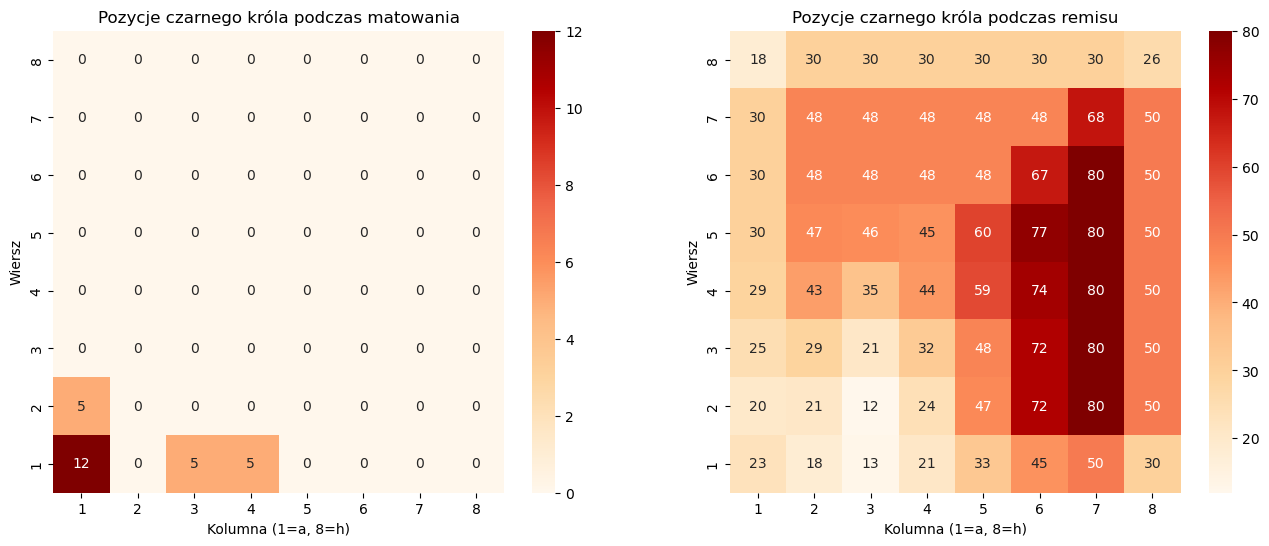

In [30]:
heatmap_data = np.zeros((8, 8))

mates = df[df['white-depth-of-win'] == 0]
counts = mates.groupby(['black-king-rank', 'black-king-file']).size().unstack(fill_value=0)
counts = counts.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)


draws = df[df['white-depth-of-win'] == -1]
draw_counts = draws.groupby(['black-king-rank', 'black-king-file']).size().unstack(fill_value=0)
draw_counts = draw_counts.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(counts, annot=True, fmt="g", cmap="OrRd", ax=ax1)
ax1.invert_yaxis()
ax1.set_title("Pozycje czarnego króla podczas matowania")
ax1.set_xlabel('Kolumna (1=a, 8=h)')
ax1.set_ylabel('Wiersz')

sns.heatmap(draw_counts, annot=True, fmt="g", cmap="OrRd", ax=ax2)
ax2.invert_yaxis() 
ax2.set_title("Pozycje czarnego króla podczas remisu")
ax2.set_xlabel('Kolumna (1=a, 8=h)')
ax2.set_ylabel('Wiersz')

Komentarz: Podczas matowania czarny król zazwyczaj znajduje się w rogu planszy, natomiast podczas remisu bardziej w środku planszy, dalej od granic.

## Pytanie 2
Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans pomiędzy białym królem a czarnym królem. Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

Text(0.05, 0.95, 'r = 0.266')

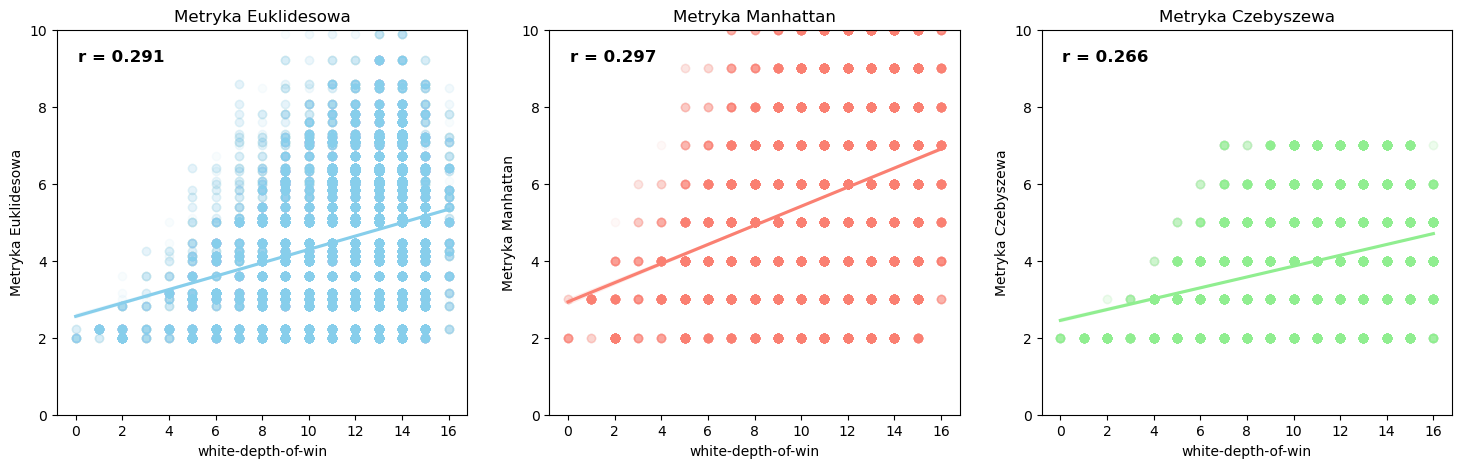

In [31]:
dx = df['white-king-file'] - df['black-king-file']
dy = df['white-king-rank'] - df['black-king-rank']
df['dist_eucl'] = np.sqrt(dx**2 + dy**2)
df['dist_manh'] = np.abs(dx) + np.abs(dy)
df['dist_czeb'] = np.maximum(np.abs(dx), np.abs(dy))

wins = df[df['white-depth-of-win'] != -1]
corr_eucl = wins['white-depth-of-win'].corr(wins['dist_eucl'])
corr_manh = wins['white-depth-of-win'].corr(wins['dist_manh'])
corr_czeb = wins['white-depth-of-win'].corr(wins['dist_czeb'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
y_limit = (0, 10)
sns.regplot(data=wins, x='white-depth-of-win', y='dist_eucl', ax=axes[0], 
            color='skyblue', scatter_kws={'alpha':0.05})
axes[0].set_title('Metryka Euklidesowa')
axes[0].set_ylabel('Metryka Euklidesowa')
axes[0].set_ylim(y_limit)
axes[0].text(0.05, 0.95, f'r = {corr_eucl:.3f}', transform=axes[0].transAxes, verticalalignment='top', fontweight='bold', fontsize=12)

sns.regplot(data=wins, x='white-depth-of-win', y='dist_manh', ax=axes[1], 
            color='salmon', scatter_kws={'alpha':0.05})
axes[1].set_title('Metryka Manhattan')
axes[1].set_ylabel('Metryka Manhattan')
axes[1].set_ylim(y_limit)
axes[1].text(0.05, 0.95, f'r = {corr_manh:.3f}', transform=axes[1].transAxes, verticalalignment='top', fontweight='bold', fontsize=12)

sns.regplot(data=wins, x='white-depth-of-win', y='dist_czeb', ax=axes[2], 
            color='lightgreen', scatter_kws={'alpha':0.05})
axes[2].set_title('Metryka Czebyszewa')
axes[2].set_ylabel('Metryka Czebyszewa')
axes[2].set_ylim(y_limit)
axes[2].text(0.05, 0.95, f'r = {corr_czeb:.3f}', transform=axes[2].transAxes, verticalalignment='top', fontweight='bold', fontsize=12)

Komentarz: Z samego wykresu trudno odczytać, która metryka jest najlepsza, dlatego policzyłam współczynnik korelacji Pearsona. Najlepszy współczynnik ma metryka Manhattan, ale wszystkie wyniki są zbliżone.

## Pytanie 3
Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

C:\Users\natal\AppData\Local\Temp\ipykernel_25680\1356614833.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wins, x='bk_dist_edge', y='white-depth-of-win', palette='Set2')


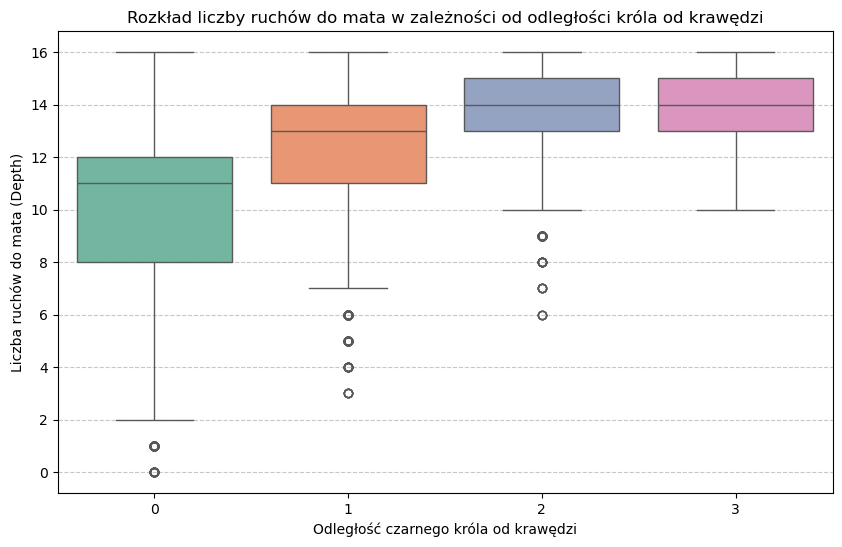

In [32]:
# Metryka Czebyszewa najbardziej naturalnie odpowiada ruchom króla,
#  więc do tego pytania posłużę się odległością w metryce Czebyszewa.

df['bk_dist_edge'] = df[['black-king-file', 'black-king-rank']].apply(
    lambda row: min(row['black-king-file'] - 1, 8 - row['black-king-file'], 
                    row['black-king-rank'] - 1, 8 - row['black-king-rank']), axis=1)

wins = df[df['white-depth-of-win'] != -1]
plt.figure(figsize=(10, 6))
sns.boxplot(data=wins, x='bk_dist_edge', y='white-depth-of-win', palette='Set2')

plt.title('Rozkład liczby ruchów do mata w zależności od odległości króla od krawędzi')
plt.xlabel('Odległość czarnego króla od krawędzi')
plt.ylabel('Liczba ruchów do mata (Depth)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Komentarz: Tak, ta informacja pomaga - im bliżej krawędzi jest czarny król tym szybciej nastąpi mat.

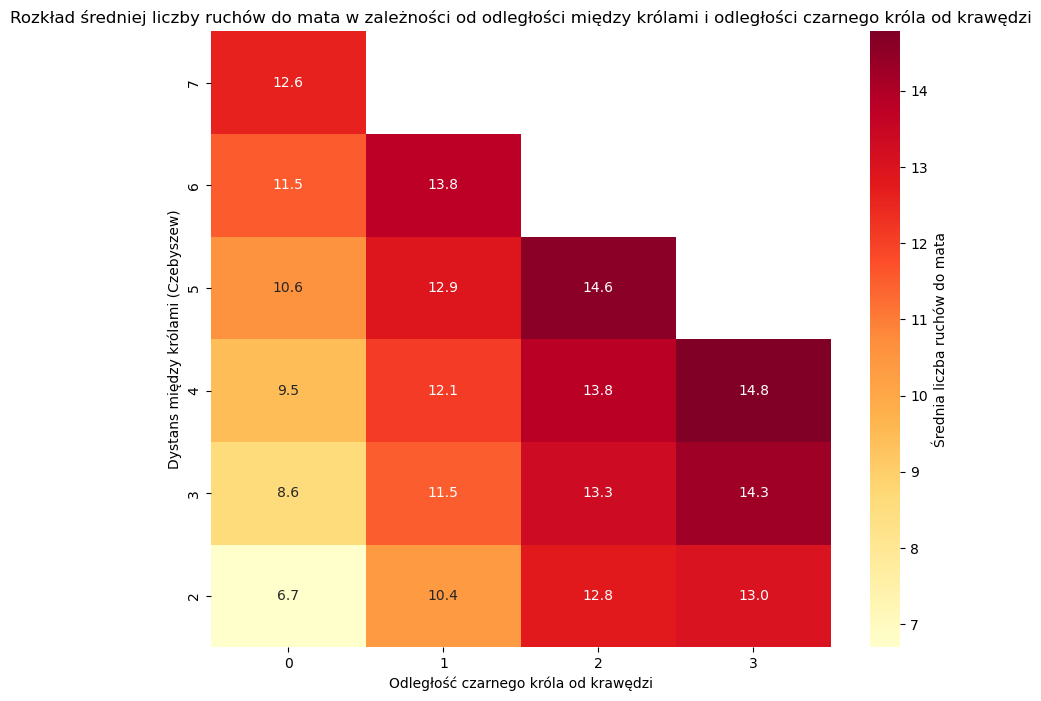

In [33]:
pivot_table = wins.pivot_table(
    values='white-depth-of-win', 
    index='dist_czeb', 
    columns='bk_dist_edge', 
    aggfunc='mean'
)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", 
            cmap="YlOrRd", cbar_kws={'label': 'Średnia liczba ruchów do mata'})
plt.title('Rozkład średniej liczby ruchów do mata w zależności od odległości między królami i odległości czarnego króla od krawędzi')
plt.xlabel('Odległość czarnego króla od krawędzi')
plt.ylabel('Dystans między królami (Czebyszew)')
plt.gca().invert_yaxis()

Komentarz: Tak, najszybciej następuje mat jeśli czarny król jest blisko krawędzi i blisko białego króla, im większe odległości, tym więcej potrzebnych ruchów do końca gry.